In [1]:
import numpy as np
import pandas as pd
df_test = pd.read_csv("D:\Excelr_assignments\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")
df_train = pd.read_csv("D:\Excelr_assignments\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
df_test.head()


<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\E'
C:\Users\dell\AppData\Local\Temp\ipykernel_14024\364969225.py:3: SyntaxWarning: invalid escape sequence '\E'
  df_test = pd.read_csv("D:\Excelr_assignments\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")
C:\Users\dell\AppData\Local\Temp\ipykernel_14024\364969225.py:4: SyntaxWarning: invalid escape sequence '\E'
  df_train = pd.read_csv("D:\Excelr_assignments\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.shape

(418, 11)

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isnull().sum()

# in the train data set we have null values in the 3 columns:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isnull().sum()

# in the  test dataset also 3 columns are having the null values:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

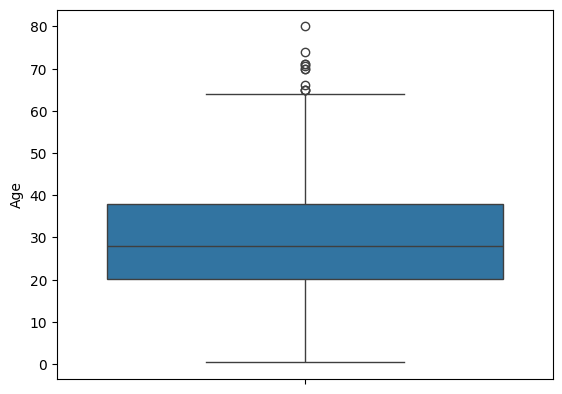

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df_train["Age"])
plt.show()

# age column in the train dataset which containg the null values have outlayers in it so we will fill the null values with median in this column:


<Axes: ylabel='Age'>

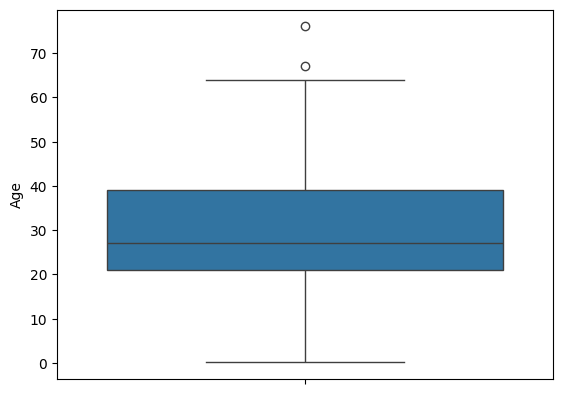

In [9]:
sns.boxplot(df_test["Age"])

# age column in the test dataset which containg the null values have outlayers in it so we will fill the null values with median in this column:


<Axes: ylabel='Fare'>

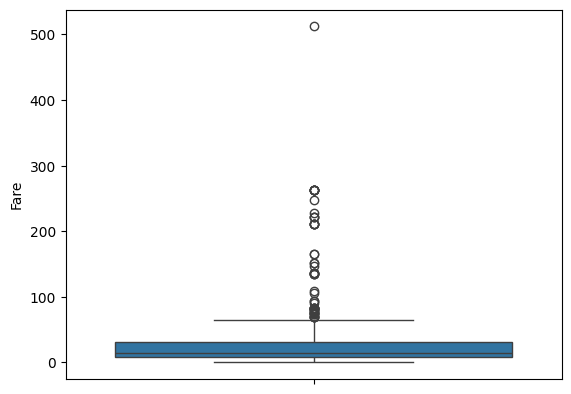

In [10]:
sns.boxplot(df_test["Fare"])

In [11]:
# filling the null values in the both dataset :

# in the test dataset:
df_test["Age"].fillna(df_test["Age"].median(),inplace=True)
df_test["Fare"].fillna(df_test["Fare"].median(),inplace=True)
df_test["Cabin"].fillna(df_test["Cabin"].mode()[0],inplace=True)

#in the train dataset:
df_train["Age"].fillna(df_train["Age"].median(),inplace=True)
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0],inplace=True)
df_train["Cabin"].fillna(df_train["Cabin"].mode()[0],inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14024\2895111777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Age"].fillna(df_test["Age"].median(),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_14024\2895111777.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: >

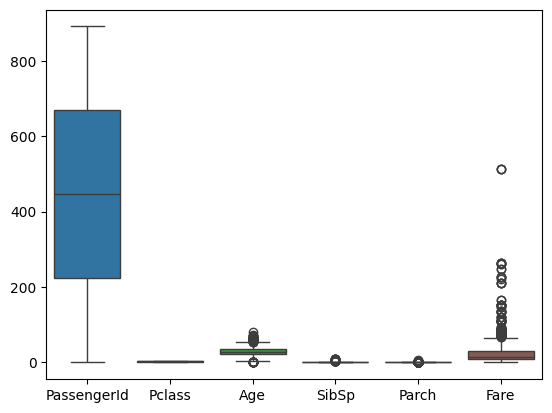

In [13]:
# for the trian dataset:

columns = ["PassengerId","Pclass","Age","SibSp","Parch","Fare"]
sns.boxplot(df_train[columns])

<Axes: >

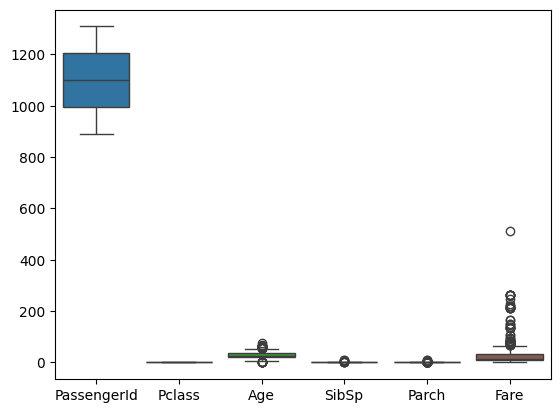

In [14]:
# for testing dataset

sns.boxplot(df_test[columns])

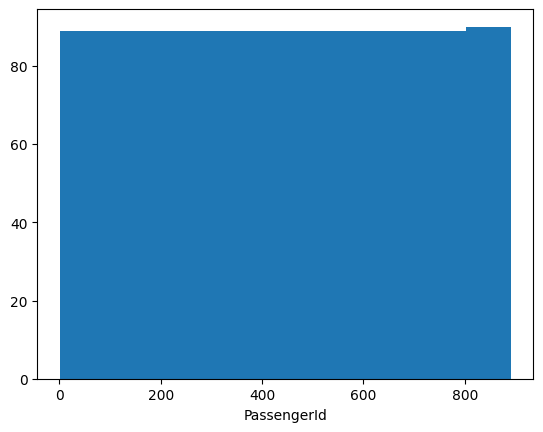

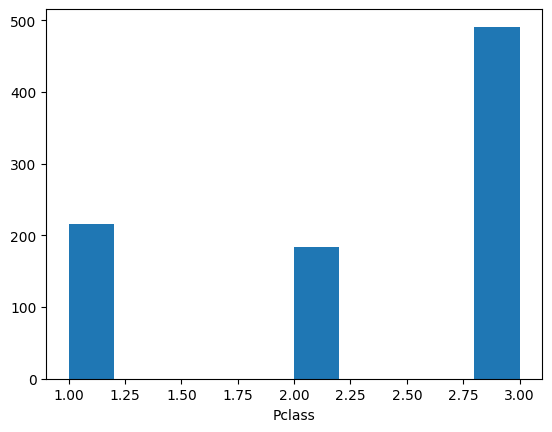

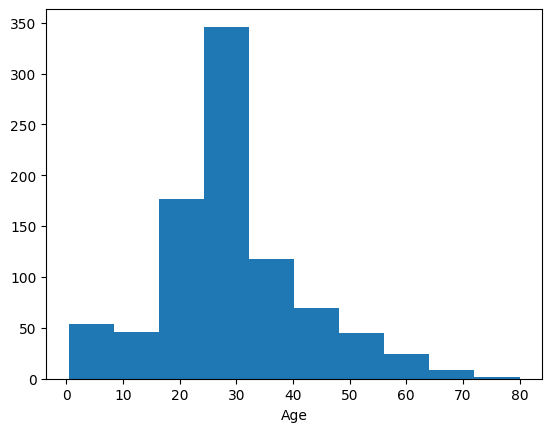

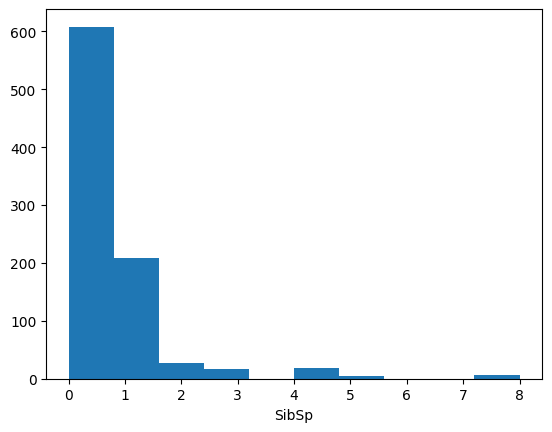

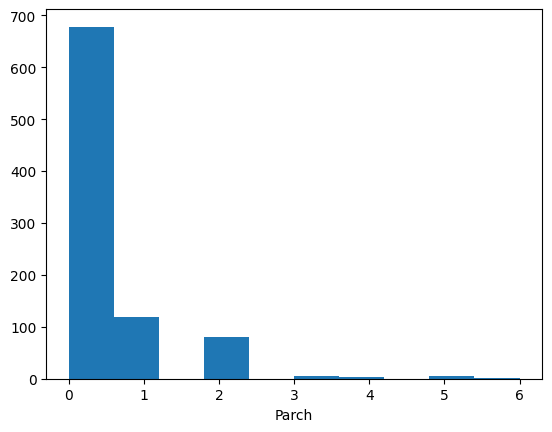

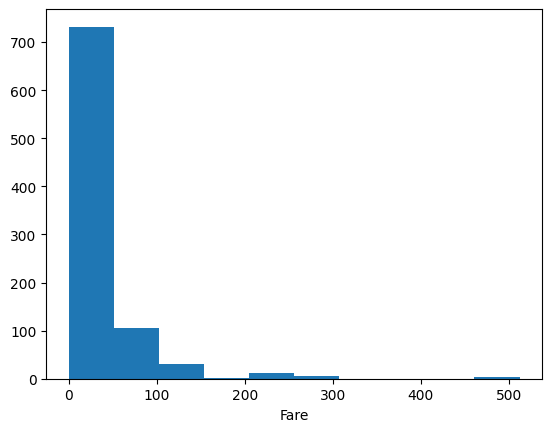

In [15]:
for col in columns:
    plt.figure()
    plt.hist(df_train[col])
    plt.xlabel(col)
    plt.show()

In [16]:
# removing the outlayers from the train data set:

q1 = df_train[columns].quantile(0.25)
q3 = df_train[columns].quantile(0.75)
iqr = q3-q1
df_train = df_train[
        ~((df_train[columns].lt(q1 - 1.5 * iqr)) | (df_train[columns].gt(q3 + 1.5 * iqr))).any(axis=1)
]

<Axes: >

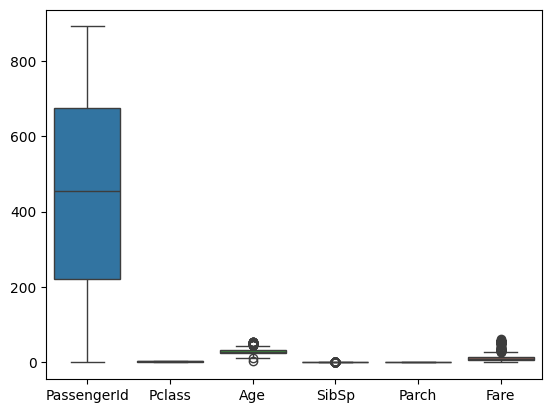

In [17]:
sns.boxplot(df_train[columns])

In [18]:
# removing the outlayers from the train data set:

q1 = df_test[columns].quantile(0.25)
q3 = df_test[columns].quantile(0.75)
iqr = q3-q1
df_test = df_test[
        ~((df_test[columns].lt(q1 - 1.5 * iqr)) | (df_test[columns].gt(q3 + 1.5 * iqr))).any(axis=1)
]

<Axes: >

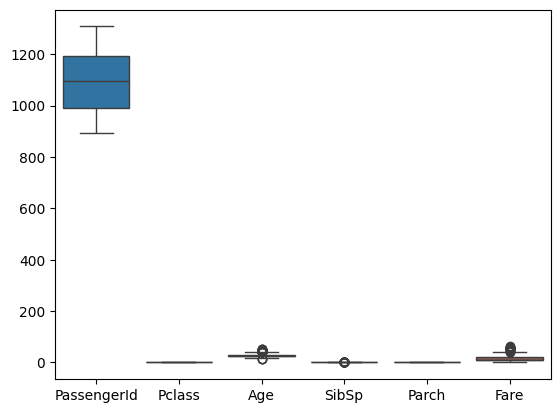

In [19]:
sns.boxplot(df_test[columns])

In [20]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

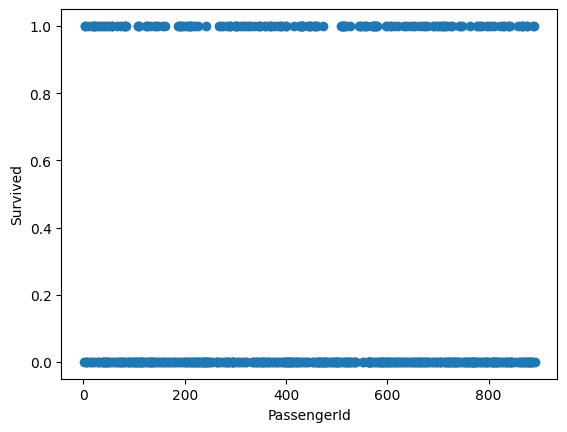

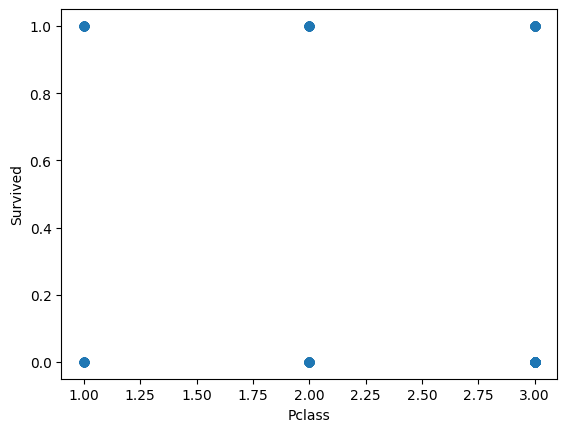

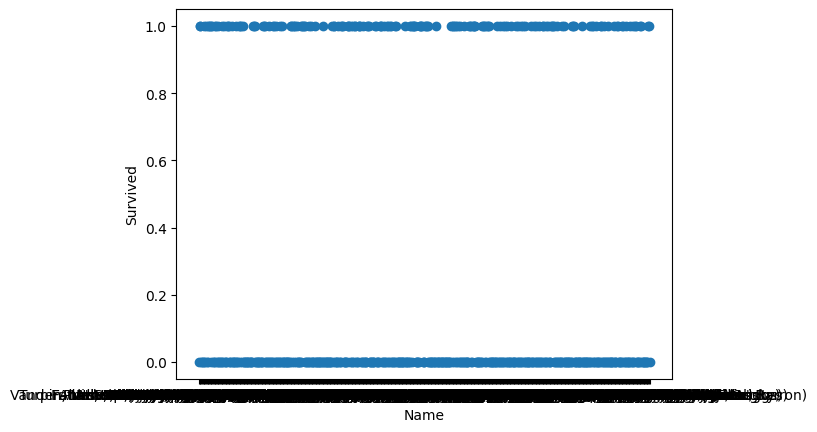

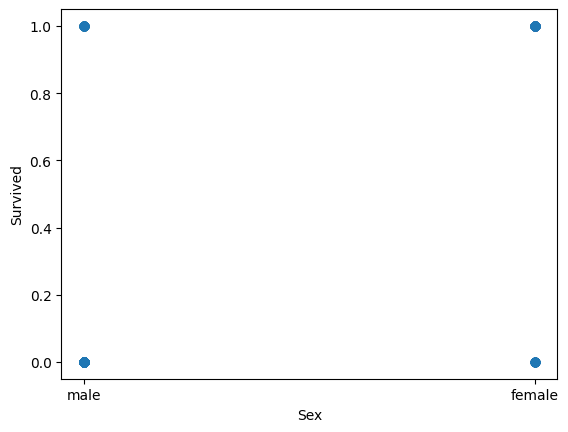

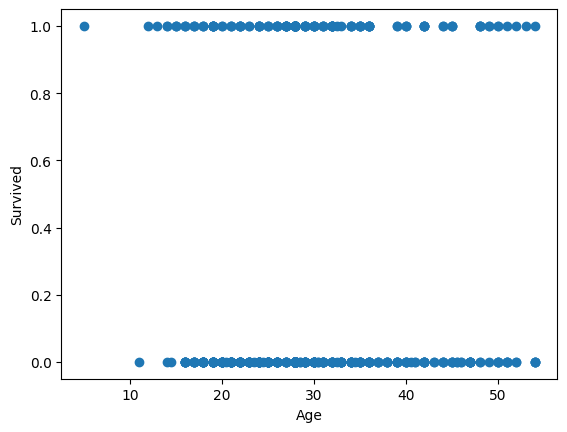

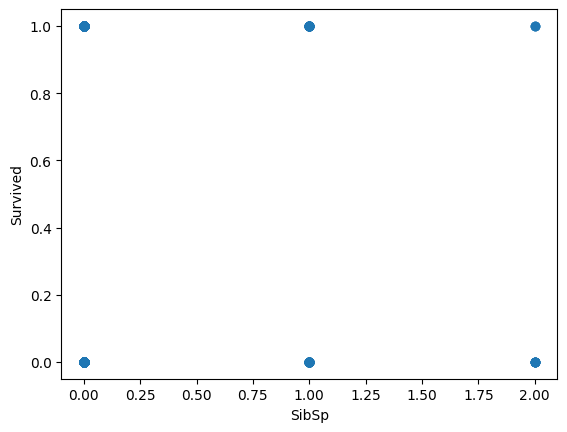

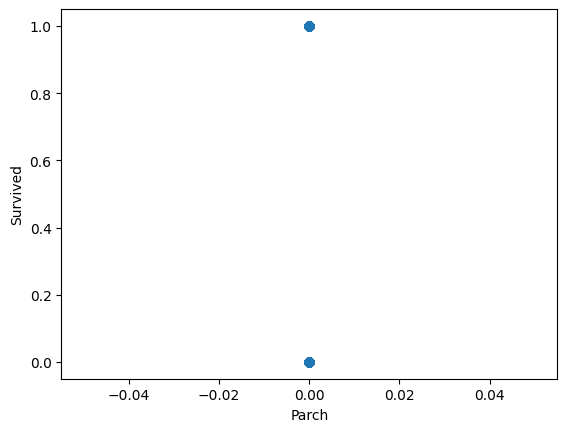

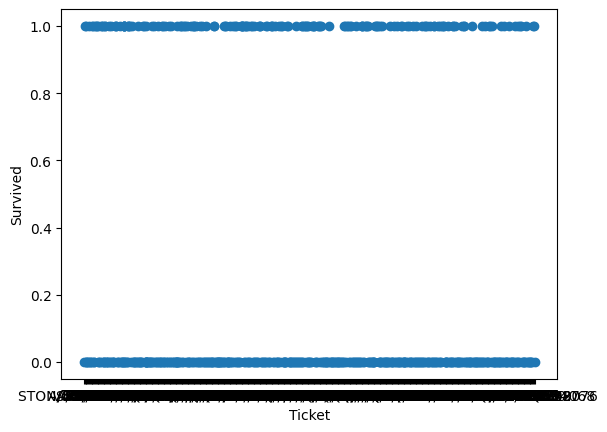

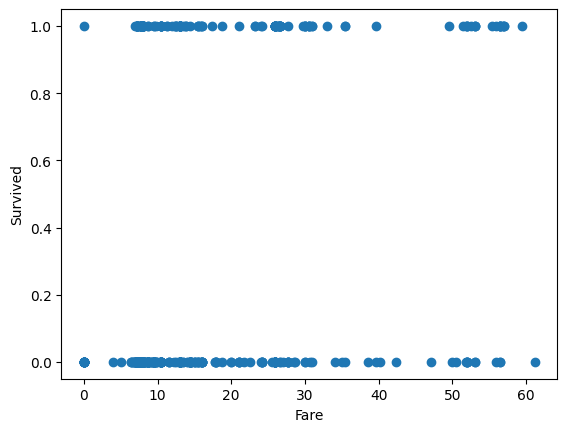

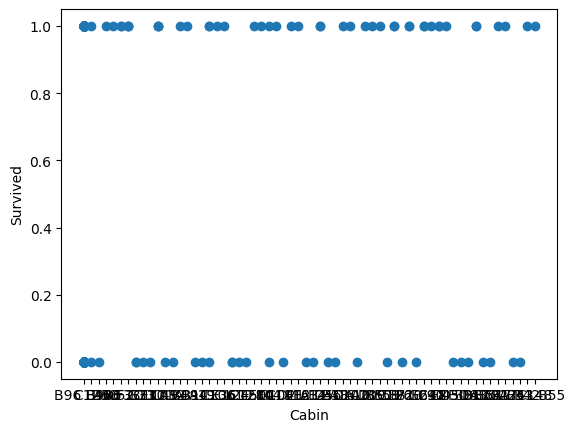

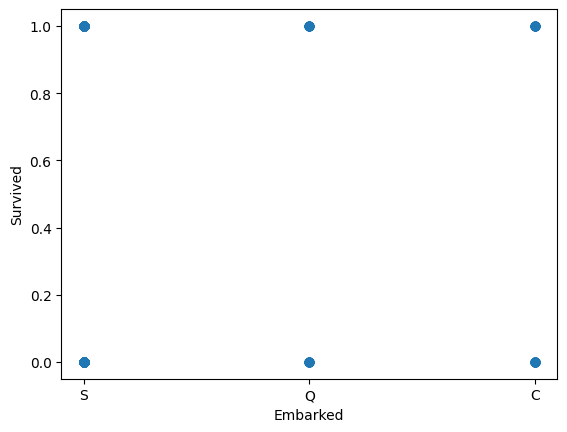

In [21]:
# scatter ploting the data in the dataset:

column = df_train.drop(columns = "Survived")
for col in column:
    plt.figure()
    plt.scatter(x = df_train[col],y = df_train["Survived"])
    plt.xlabel(col)
    plt.ylabel("Survived")
    plt.show()

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    int64  
 7   Parch        577 non-null    int64  
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Cabin        577 non-null    object 
 11  Embarked     577 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB


In [23]:
# fro the training dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = ["Sex","Ticket","Cabin","Embarked"]
for col in columns:
    df_train[col] = le.fit_transform(df_train[col])

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,413,7.2500,19,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,518,7.9250,19,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,32,53.1000,25,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,370,8.0500,19,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,200,8.4583,19,1


In [24]:
# for the testing dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = ["Sex","Ticket","Cabin","Embarked"]
for col in columns:
    df_test[col] = le.fit_transform(df_test[col])

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,108,7.8292,8,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,169,7.0000,8,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,103,8.6625,8,2
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,201,9.2250,8,2
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,114,7.6292,8,1


In [25]:
# for the trianing dataset:

from sklearn.preprocessing import StandardScaler

num_cols = [col for col in df_train.select_dtypes(include=['int64', 'float64']).columns if col not in columns]
scaler = StandardScaler()

# Apply scaling only on numeric columns
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])


In [26]:
# for the testing dataset:

from sklearn.preprocessing import StandardScaler

num_cols = [col for col in df_test.select_dtypes(include=['int64', 'float64']).columns if col not in columns]
scaler = StandardScaler()

# Apply scaling only on numeric columns
df_test[num_cols] = scaler.fit_transform(df_test[num_cols])


In [27]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.692908,0.732143,"Kelly, Mr. James",1,0.792134,-0.450276,0.0,108,-0.608693,8,1
1,-1.684559,0.732143,"Wilkes, Mrs. James (Ellen Needs)",0,2.382059,1.658516,0.0,169,-0.673495,8,2
3,-1.667860,0.732143,"Wirz, Mr. Albert",1,-0.161822,-0.450276,0.0,103,-0.543572,8,2
5,-1.651162,0.732143,"Svensson, Mr. Johan Cervin",1,-1.815344,-0.450276,0.0,201,-0.499613,8,2
6,-1.642812,0.732143,"Connolly, Miss. Kate",0,0.219760,-0.450276,0.0,114,-0.624323,8,1
...,...,...,...,...,...,...,...,...,...,...,...
410,1.730286,0.732143,"Naughton, Miss. Hannah",0,-0.161822,-0.450276,0.0,176,-0.614883,8,1
412,1.746985,0.732143,"Henriksson, Miss. Jenny Lovisa",0,-0.034628,-0.450276,0.0,136,-0.612929,8,2
413,1.755334,0.732143,"Spector, Mr. Woolf",1,-0.161822,-0.450276,0.0,207,-0.591438,8,2
415,1.772033,0.732143,"Saether, Mr. Simon Sivertsen",1,1.300910,-0.450276,0.0,256,-0.653957,8,2


In [28]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.733575,-0.654384,0.67833,"Braund, Mr. Owen Harris",1,-0.854761,1.800735,0.0,413,-0.609448,19,2
2,-1.725863,1.528156,0.67833,"Heikkinen, Miss. Laina",0,-0.386610,-0.448235,0.0,518,-0.555858,19,2
3,-1.722007,1.528156,-2.04917,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.666730,1.800735,0.0,32,3.030715,25,2
4,-1.718151,-0.654384,0.67833,"Allen, Mr. William Henry",1,0.666730,-0.448235,0.0,370,-0.545934,19,2
5,-1.714295,-0.654384,0.67833,"Moran, Mr. James",1,-0.152535,-0.448235,0.0,200,-0.513517,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,1.675034,-0.654384,0.67833,"Sutehall, Mr. Henry Jr",1,-0.503648,-0.448235,0.0,499,-0.625326,19,2
886,1.682746,-0.654384,-0.68542,"Montvila, Rev. Juozas",1,-0.269572,-0.448235,0.0,63,-0.152939,19,2
887,1.686602,1.528156,-2.04917,"Graham, Miss. Margaret Edith",0,-1.205875,-0.448235,0.0,9,1.196740,14,2
889,1.694314,1.528156,-2.04917,"Behr, Mr. Karl Howell",1,-0.386610,-0.448235,0.0,3,1.196740,29,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define target column
target_column = 'Survived'

# Split features and target
X = df_train.drop(columns=[target_column,"Name"])
y = df_train[target_column].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Ensure target labels are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [31]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 144, number of negative: 317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 461, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.312364 -> initscore=-0.789088
[LightGBM] [Info] Start training from score -0.789088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\dell\anaconda3.1\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
# Predictions
lgb_preds = lgb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# LightGBM evaluation
print("🔹 LightGBM Model Performance:")
print("Accuracy:", accuracy_score(y_test, lgb_preds))
print("Precision:", precision_score(y_test, lgb_preds))
print("Recall:", recall_score(y_test, lgb_preds))
print("F1 Score:", f1_score(y_test, lgb_preds))

# XGBoost evaluation
print("\n🔹 XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))


🔹 LightGBM Model Performance:
Accuracy: 0.8362068965517241
Precision: 0.7272727272727273
Recall: 0.5517241379310345
F1 Score: 0.6274509803921569

🔹 XGBoost Model Performance:
Accuracy: 0.8620689655172413
Precision: 0.782608695652174
Recall: 0.6206896551724138
F1 Score: 0.6923076923076923


In [33]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for LightGBM
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# GridSearchCV with cross-validation
grid_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid,
                        cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit on training data
grid_lgb.fit(X_train, y_train)

# Best model evaluation
best_lgb = grid_lgb.best_estimator_
best_preds = best_lgb.predict(X_test)

print("\n🔹 LightGBM After Tuning:")
print("Best Parameters:", grid_lgb.best_params_)
print("Accuracy:", accuracy_score(y_test, best_preds))
print("F1 Score:", f1_score(y_test, best_preds))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 144, number of negative: 317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 461, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.312364 -> initscore=-0.789088
[LightGBM] [Info] Start training from score -0.789088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

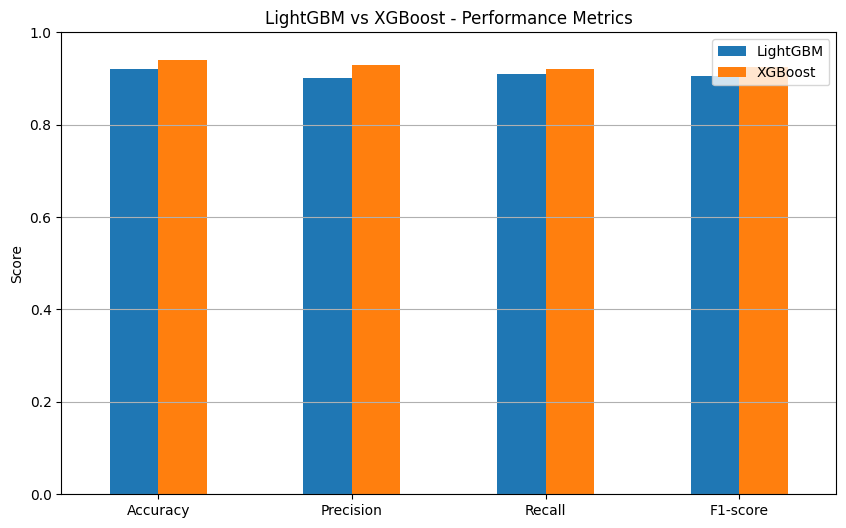

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Example metric values — replace with your actual model scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lightgbm_scores = [0.92, 0.90, 0.91, 0.905]  # Replace with actual scores
xgboost_scores = [0.94, 0.93, 0.92, 0.925]   # Replace with actual scores

# Creating the comparison DataFrame
comparison_df = pd.DataFrame({
    'LightGBM': lightgbm_scores,
    'XGBoost': xgboost_scores
}, index=metrics)

# Now plot it
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("LightGBM vs XGBoost - Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Predict using trained models
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Define a function to collect all metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Get metrics for both models
metrics_lgb = get_metrics(y_test, y_pred_lgb)
metrics_xgb = get_metrics(y_test, y_pred_xgb)

# Combine the metrics into a dataframe for comparison
comparison_df = pd.DataFrame({
    'LightGBM': metrics_lgb,
    'XGBoost': metrics_xgb
}).T

# Print metrics
print("Performance Comparison:\n")
print(comparison_df)


Performance Comparison:

          Accuracy  Precision    Recall  F1 Score
LightGBM  0.836207   0.727273  0.551724  0.627451
XGBoost   0.862069   0.782609  0.620690  0.692308


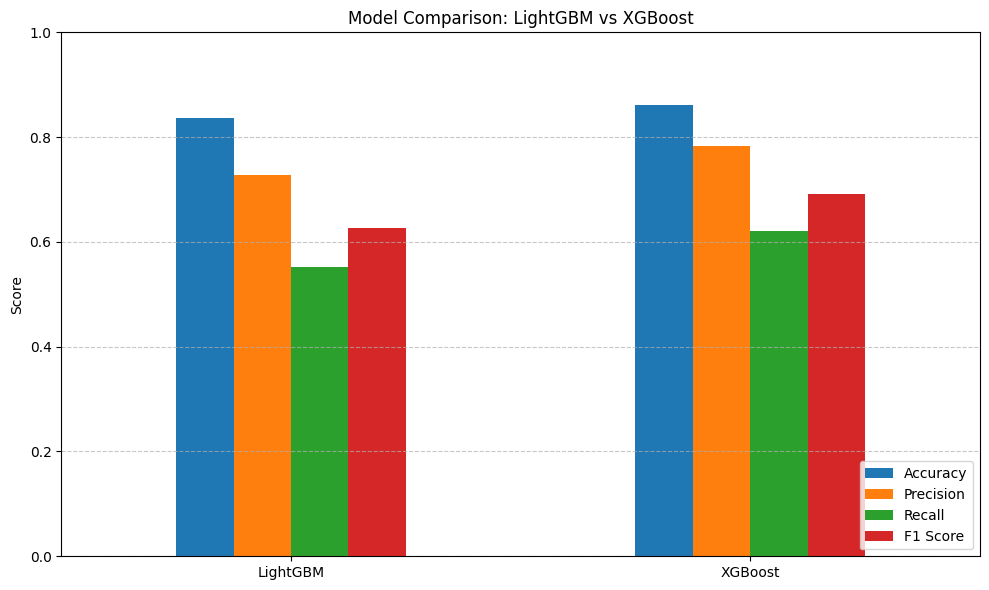

In [37]:
# Bar plot to visualize the comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
